# Summer Olympics Athlete Analysis: Dominance, Versatility, and Career Longevity

<img src = "image.png" width = "600" height = "600"/>

In this project we will analyse `Athlete's` 'Dominance' , 'Versatility' and 'Career Longevity' in Summer Olympics from 1976-2008.

What are they???

Here it is :

* **Dominance** -> *How well an athlete performs compared to others in their sport. If they keep winning medals or coming first in competitions, they are considered dominant. It shows that they are among the best in their field.*
  
* **Versatility** -> *An athlete’s ability to compete in different events or sports. If an athlete can perform well in multiple events, like running and jumping, they are versatile. It shows they are skilled in more than one area.*
  
* **Career longevity** -> *How long an athlete can keep competing at a high level. If an athlete has a long career with good performance over many years, they have strong career longevity. It shows they can stay successful for a long time.*

### 1. Gathering Tools

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading the data in the notebook

In [2]:
df = pd.read_csv("Data/Summer-Olympic-medals-1976-to-2008.csv", encoding = 'ISO-8859-1')

### 3. Data Overview

In [3]:
## shape of the data (Rows , Columns)
df.shape

(15433, 11)

In [4]:
## look first five rows of the data
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [5]:
## Last Five rows
df.tail()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold
15432,Beijing,2008.0,Wrestling,Wrestling Gre-R,96 - 120kg,"LOPEZ, Mijain",Men,CUB,Cuba,M,Gold


In [6]:
## Columns names
df.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

### Data Dictionary

* **City** -> *City in which the Olympic Games were held.*
* **Year** -> *Year in which the Olympic Games were held.*
* **Sport** -> *Sport Category(eg. Aquatics , Atheletics etc.).*
* **Discipline** -> *The discipline within the sport (eg. Diving , Swimming etc.).*
* **Event** -> *Event Name within the particular discipline (eg. 3m springboard ,10m platform etc.)*
* **Athlete** -> *Winner Name in that event.*
* **Gender** -> *Gender*
* **Country_Code** -> *3 character country code.*
* **Country** -> *Country to which the winning athelete belongs.*
* **Event_gender** -> *Genders which participated in the event(Male , Female , Common Event).*
* **Medal** -> *Medal Category (Gold , Silver and Bronze)*

In [7]:
## Statistical overview
df.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [8]:
## summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [9]:
## memory usage of each columns in bytes!
df.memory_usage()  

Index              132
City            123464
Year            123464
Sport           123464
Discipline      123464
Event           123464
Athlete         123464
Gender          123464
Country_Code    123464
Country         123464
Event_gender    123464
Medal           123464
dtype: int64

In [10]:
## Check for unique valuses of each columns
df.nunique(axis = 0)

City                9
Year                9
Sport              28
Discipline         41
Event             293
Athlete         11337
Gender              2
Country_Code      128
Country           127
Event_gender        3
Medal               3
dtype: int64

In [11]:
## check for missing values if any
df.isna().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [12]:
## check for duplicate rows in the dataframe
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15428    False
15429    False
15430    False
15431    False
15432    False
Length: 15433, dtype: bool

`Fales` means there is no duplicate row in the data frame.

### 4. Data Cleaning

**It is the crucial step before analysing the data.**

One of the way is to drop the rows having missing values.

In [13]:
df.dropna(subset = df.columns , inplace = True) 

In [14]:
# Check again
df.isna().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

### 5. EDA

#### 5.1 Analyze medal distribution

In [16]:
## Medal count by Country
country_medals = df.groupby('Country')['Medal'].count().sort_values(ascending = False)
country_medals

Country
United States    1992
Soviet Union     1021
Australia         798
Germany           691
China             679
                 ... 
Panama              1
Senegal             1
Sri Lanka           1
Sudan               1
Macedonia           1
Name: Medal, Length: 127, dtype: int64

**Observations**

- United States has won large number of medals!
- Macedonia won only 1 medal 

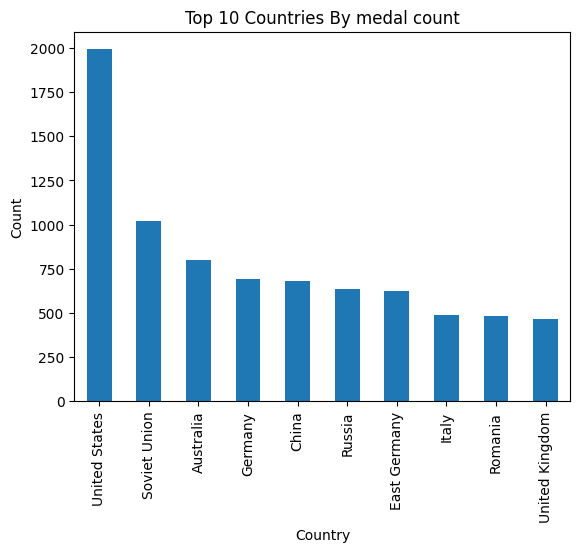

In [17]:
## Let's visualise the top 10 countries
country_medals.head(10).plot(kind = "bar" , ylabel = "Count", title = "Top 10 Countries By medal count");

In [18]:
## Medal count by Athelete
athlete_medals = df.groupby('Athlete')['Medal'].count().sort_values(ascending = False)
athlete_medals

Athlete
PHELPS, Michael        16
FISCHER, Birgit        12
NEMOV, Alexei          12
TORRES, Dara           12
THOMPSON, Jenny        12
                       ..
JAANSON, Jueri          1
JAANSON, Juri           1
JABLKOWSKI, Piotr       1
JABRAILOV, Elmadi       1
ÖRSTED, Hans-Henrik     1
Name: Medal, Length: 11337, dtype: int64

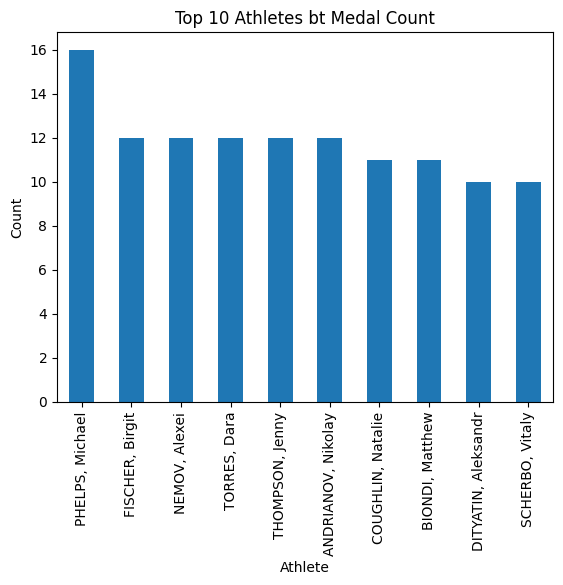

In [19]:
## Visualise top 10 athelete
athlete_medals.head(10).plot(kind = "bar" , ylabel = "Count" , title = 'Top 10 Athletes bt Medal Count');

**Observation**

`PHELPS, Michael` Won more medals!

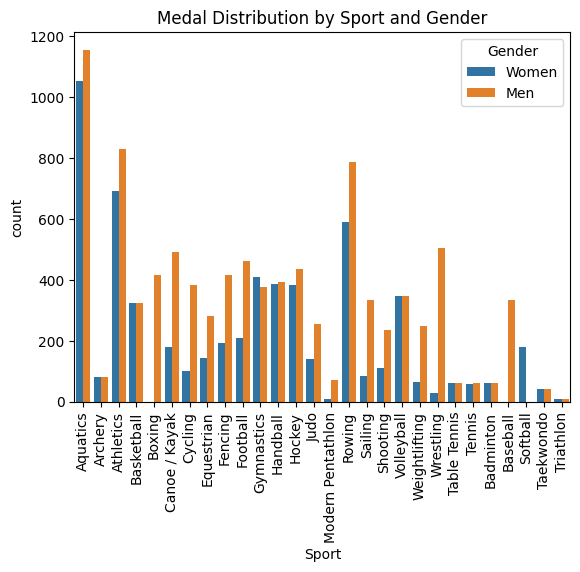

In [20]:
## Medal Count by Sport and Gender
sns.countplot(data=df, x='Sport', hue='Gender')
plt.title('Medal Distribution by Sport and Gender')
plt.xticks(rotation=90)
plt.show()

**Observation**

Male dominate over Women!

#### 5.2 Dominance Analysis

In [21]:
## Top Athletes by Event
dominant_athletes = df.groupby(['Athlete' , 'Event'])['Medal'].count().sort_values(ascending = False)
dominant_athletes

Athlete               Event                           
FISCHER, Birgit       K-4 500m (kayak four)               5
SCHUMANN, Ralf        25m rapid fire pistol (60 shots)    5
TORRES, Dara          4x100m freestyle relay              5
EDWARDS, Teresa       basketball                          5
GEORGESCU, Elena      eight with coxswain (8+)            5
                                                         ..
HÜBNER, Frank         470 - Two Person Dinghy             1
HÜLSENBECK, Sarina    4x100m freestyle relay              1
IAKIMOVITCH, Mikhail  handball                            1
IAKOVLEV, Roman       volleyball                          1
ÖRSTED, Hans-Henrik   Individual Pursuit                  1
Name: Medal, Length: 12955, dtype: int64

In [22]:
## Country Dominance by event
country_dominace = df.groupby(['Country' , 'Event'])['Medal'].count().sort_values(ascending = False)
country_dominace

Country        Event              
United States  basketball             192
Netherlands    hockey                 159
Australia      hockey                 145
Cuba           baseball               111
Brazil         football               109
                                     ... 
Romania        shot put                 1
France         pommel horse             1
               skeet (125 targets)      1
               trap (75 targets)        1
Afghanistan    - 58 kg                  1
Name: Medal, Length: 3314, dtype: int64

**Observations**

`United States` won more medals in basketball

#### 5.3 Versatility Analysis

In [23]:
## Athletes Competing in Multiple Events
versatile_athletes = df.groupby('Athlete')['Event'].nunique().sort_values(ascending = False)
versatile_athletes

Athlete
ANDRIANOV, Nikolay     8
PHELPS, Michael        8
DITYATIN, Aleksandr    8
NEMOV, Alexei          7
SCHERBO, Vitaly        7
                      ..
HOMMOLA, Ute           1
HONCHAROVA, Iryna      1
HONEY, Gary            1
HONG, Cha Ok           1
ÖRSTED, Hans-Henrik    1
Name: Event, Length: 11337, dtype: int64

In [24]:
## Medal Distribution by Versatile Athletes
versatile_medals = df[df['Athlete'].isin(versatile_athletes.index)]
versatile_medals.groupby('Athlete')['Medal'].count().sort_values(ascending=False).head(10)

Athlete
PHELPS, Michael        16
FISCHER, Birgit        12
NEMOV, Alexei          12
TORRES, Dara           12
THOMPSON, Jenny        12
ANDRIANOV, Nikolay     12
COUGHLIN, Natalie      11
BIONDI, Matthew        11
DITYATIN, Aleksandr    10
SCHERBO, Vitaly        10
Name: Medal, dtype: int64

#### 5.4 Career Longevity Analysis

In [34]:
## Athlete Longevity
athlete_years = df.groupby('Athlete').agg({'Year': ['min' , 'max']})  # group the data of different by year in which they started to play and last played
athlete_years['Career_Length'] = athlete_years['Year']['max'] - athlete_years['Year']['min']
athlete_years.sort_values(by='Career_Length', ascending=False).head(10)

Year         Career_Length
                         min     max              
Athlete                                           
KUZNETSOV, Mikhail    1976.0  2008.0          32.0
TORRES, Dara          1984.0  2008.0          24.0
FISCHER, Birgit       1980.0  2004.0          24.0
SCHÜMANN, Jochen      1976.0  2000.0          24.0
IDEM, Josefa          1984.0  2008.0          24.0
SALUKVADZE, Nino      1988.0  2008.0          20.0
OTTEY-PAGE, Merlene   1980.0  2000.0          20.0
DAVIDSON, Bruce Oram  1976.0  1996.0          20.0
OVCHINNIKOVA, Elena   1988.0  2008.0          20.0
YAMAMOTO, Hiroshi     1984.0  2004.0          20.0

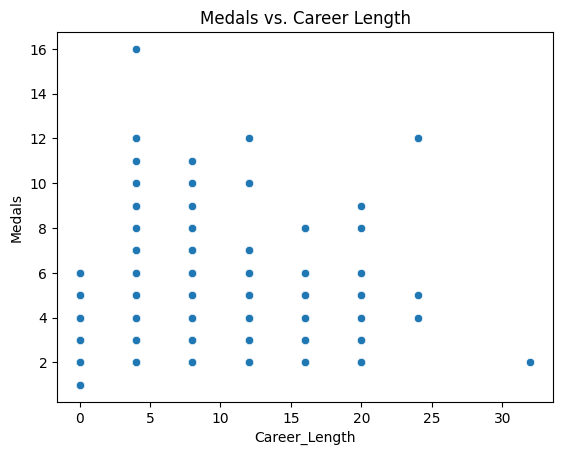

In [40]:
## Medals Over Career Length
athlete_years['Medals'] = df.groupby('Athlete')['Medal'].count()
sns.scatterplot(data=athlete_years, x='Career_Length', y='Medals')
plt.title('Medals vs. Career Length')
plt.show()

#### 5.4 Visualize Key Patterns

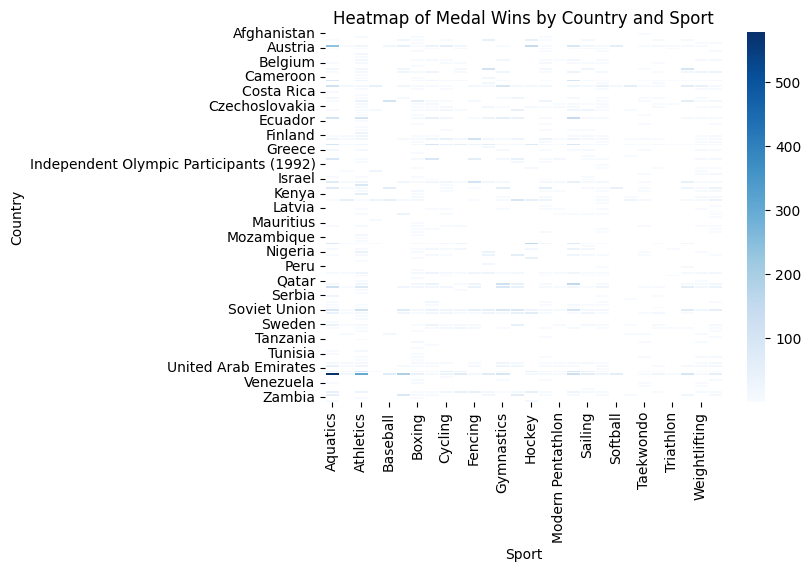

In [41]:
## Heatmap of Medal Wins by Country and Sport
country_sport_medals = df.pivot_table(index='Country', columns='Sport', values='Medal', aggfunc='count')
sns.heatmap(country_sport_medals, cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Medal Wins by Country and Sport')
plt.show()

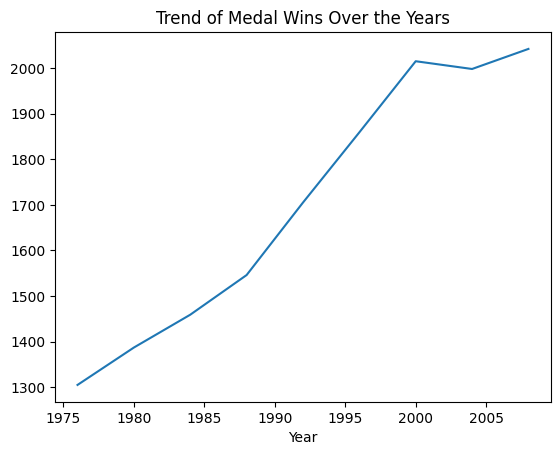

In [42]:
## Trend of Medal Wins Over the Years
yearly_medals = df.groupby('Year')['Medal'].count()
yearly_medals.plot(kind='line', title='Trend of Medal Wins Over the Years')
plt.show()